In this project, I am carrying out clustering analysis on the Adult dataset to find possible clusters. The data was gathered randomly and I am hoping to classify them into groups. This can help us to understand the variety of people in this particular community. 

The dataset


|| Variable | Type | Missing Values |
| --- | --- | --- | --- |
|1| age	| Integer	| no |
|2| workclass | Categorical | yes |
|3| fnlwgt	| Integer	| no |
|4| education	| Categorical	|	no |
|5| education-num	| Integer	|	no |
|6| marital-status	|	Categorical |	no |
|7| occupation	|	Categorical	| yes |
|8| relationship	|	Categorical	|	no |
|9|race | Categorical |	no |
|10| sex	| Binary	| no |
|11|capital-gain |	Integer			|	no |
|12|capital-loss |	Integer			|	no |
|13|hours-per-week|	Integer		|		no |
|15|native-country	|	Categorical	| no |
|15|income |	Binary	| no |

<br>

### Credits
```
  author       = Becker,Barry and Kohavi,Ronny,
  title        = Adult,
  year         = 1996,
  publishedby  = UCI Machine Learning Repository,
  DOI          = https://doi.org/10.24432/C5XW20
```




# Sections:

1. <a href="#libraries-id">Importing the libraries</a>
2. <a href="#data-id">Data Preprocessing</a>
3. <a href="#pca">Principal Component Analysis</a>
4. <a href='#clusters'>Finding the number of clusters</a>
5. <a href="#Kmeans-id">Kmeans</a>
6. <a href='#conclusion'>Conclusion</a>


### <a id='libraries'>Importing the libraries</a>




In [103]:
import pandas as pd
from sklearn.cluster import KMeans
from pickle import load, dump
from sklearn.metrics import (jaccard_score, f1_score,
                            accuracy_score, confusion_matrix, log_loss)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.figure_factory as ff
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer


### <a id= 'data-id'>Data Preprocessing</a>

This is a technique used to prepare the data for analysis. It entails 
* converting categorical data into numerical data, 
* removing null values, 
* dropping redundant features, 
* and scaling the data to reduce dimensions of large data 
that can affect or disrupt the model.

Here I will be encoding the categorical data using a custom built _labelEnc_ function. I will also use _StandardScaler_ Algorithm to scale the dataset.


In [4]:
df= pd.read_csv('Results.csv', sep=',')
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,pay_grade
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'pay_grade'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             5000 non-null   int64 
 1   workclass       5000 non-null   object
 2   fnlwgt          5000 non-null   int64 
 3   education       5000 non-null   object
 4   education_num   5000 non-null   int64 
 5   marital_status  5000 non-null   object
 6   occupation      5000 non-null   object
 7   relationship    5000 non-null   object
 8   race            5000 non-null   object
 9   sex             5000 non-null   object
 10  capital_gain    5000 non-null   int64 
 11  capital_loss    5000 non-null   int64 
 12  hours_per_week  5000 non-null   int64 
 13  native_country  5000 non-null   object
 14  pay_grade       5000 non-null   object
dtypes: int64(6), object(9)
memory usage: 586.1+ KB


In [7]:
def labelEnc(feat:str)->list:
    """
      This function converts the categorical variables in a feature to
      numerical by using the unique values in the column
    """
    uniques = dict(zip(list(df[feat].unique()), list(range(len(df[feat].unique())+1))))
    print(uniques)
    newlist = list(map(lambda x: uniques[x],df[feat] ))
    return newlist


In [8]:
for i in df.columns:
    if df[i].dtype =='object':
        df[i] = labelEnc(i)

{' State-gov': 0, ' Self-emp-not-inc': 1, ' Private': 2, ' Federal-gov': 3, ' Local-gov': 4, ' ?': 5, ' Self-emp-inc': 6, ' Without-pay': 7}
{' Bachelors': 0, ' HS-grad': 1, ' 11th': 2, ' Masters': 3, ' 9th': 4, ' Some-college': 5, ' Assoc-acdm': 6, ' Assoc-voc': 7, ' 7th-8th': 8, ' Doctorate': 9, ' Prof-school': 10, ' 5th-6th': 11, ' 10th': 12, ' 1st-4th': 13, ' Preschool': 14, ' 12th': 15}
{' Never-married': 0, ' Married-civ-spouse': 1, ' Divorced': 2, ' Married-spouse-absent': 3, ' Separated': 4, ' Married-AF-spouse': 5, ' Widowed': 6}
{' Adm-clerical': 0, ' Exec-managerial': 1, ' Handlers-cleaners': 2, ' Prof-specialty': 3, ' Other-service': 4, ' Sales': 5, ' Craft-repair': 6, ' Transport-moving': 7, ' Farming-fishing': 8, ' Machine-op-inspct': 9, ' Tech-support': 10, ' ?': 11, ' Protective-serv': 12, ' Armed-Forces': 13, ' Priv-house-serv': 14}
{' Not-in-family': 0, ' Husband': 1, ' Wife': 2, ' Own-child': 3, ' Unmarried': 4, ' Other-relative': 5}
{' White': 0, ' Black': 1, ' Asia

In [9]:
df.dropna(inplace=True)

In [10]:
df.columns.__len__()

15

In [11]:
# Scaling the dataset for better data

scaler = StandardScaler()
scaled_df= scaler.fit_transform(df)

In [12]:
scaled_df[0]

array([ 0.02941147, -1.86979854, -1.06491264, -0.99344448,  1.15218945,
       -0.85799429, -1.38634952, -1.06991968, -0.36196702, -0.69515422,
        0.161728  , -0.22810576, -0.04286428, -0.2595867 , -0.56842005])

### <a id="pca">Principal Component Analysis</a>

Principal component analysis, or PCA, is a dimensionality reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

You can read more [here](https://builtin.com/data-science/step-step-explanation-principal-component-analysis)

In [13]:
pca = PCA()
pca.fit(scaled_df)
pca.explained_variance_ratio_

array([0.1364448 , 0.10005706, 0.09441591, 0.0815927 , 0.07484399,
       0.06981427, 0.06723509, 0.06522987, 0.05409967, 0.05125734,
       0.05024944, 0.04686458, 0.04019113, 0.03688987, 0.03081428])

To identify the ideal number of components we need the explained variance ratio.


The explained_variance_ratio_ attribute captures the ratio of the total variance each principal component captures. 

All component of the dataset are proportions of the full information, and they all sum of to be 1.

So most times we use the number of components that sum up to carry atleast 80% of information. This doesnt necessarily translate to 80% of the components.


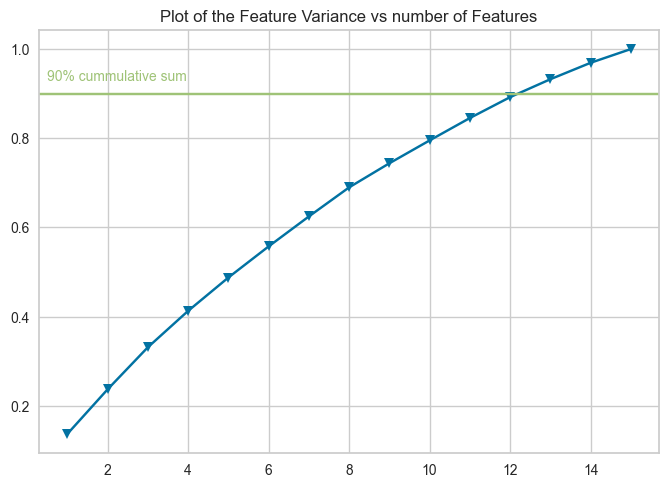

In [45]:
# to visualise the cummulative sum of the variance
plt.title('Plot of the Feature Variance vs number of Features')
plt.plot(range(1,16), pca.explained_variance_ratio_.cumsum(), marker='v')
plt.axhline(y=0.9,color='g')
plt.text(0.5,0.93, '90% cummulative sum', fontdict={'fontsize':10,'color':'g'})
plt.show()

From the graph above, we can see that at 0.8 we have 10.
Which implies that we will be using the top 10 components out of 15

In [46]:
pc = PCA(n_components=12)

pc.fit(scaled_df)

PCA(n_components=12)

In [47]:
pc.components_[0]

array([ 0.25962742, -0.03249355, -0.06998162, -0.16787303,  0.40522436,
        0.00559468, -0.18178877, -0.35906721, -0.15733549, -0.29016343,
        0.20908268,  0.18730694,  0.37021761, -0.08433559,  0.49022667])

In [48]:
# to figure out the features that are important

sd = np.abs(pc.components_[0]).argsort()[::-1]
major_components = pd.DataFrame(np.abs(pc.components_[0]),
                                index=df.columns[sd],
                                columns=['Value'])
major_components.sort_values(by='Value', ascending=False)

,Value
marital_status,0.490227
sex,0.405224
fnlwgt,0.370218
capital_loss,0.359067
education,0.290163
pay_grade,0.259627
race,0.209083
native_country,0.187307
capital_gain,0.181789
relationship,0.167873


We can see the features that are more important to carry out clustering in the data set are the following ,
* marital_status, 
* sex, 
* fnlwgt,
* capital_loss,
* education, 
* pay_grade, 
* race. 
* native_country
* capital_gain
* relationship
 
The essence of PCA is dimensionality reduction which has enabled us to reduce from 15 to 10.

These are the top 10 that we will be using for our KMeans clustering analysis.

In [49]:
pca_df = pc.transform(scaled_df)

In [50]:
pca_df[0]

array([ 1.3850961 , -1.74360715,  0.75727967, -0.88419219, -1.15489276,
       -0.38160259, -1.499777  , -0.32201968, -0.95054352,  0.23511645,
        0.07854081,  0.44573478])

## <a id='clusters'>Finding the number of Clusters</a>

### Elbow Method

The elbow method is a technique used in clustering analysis to determine the optimal number of clusters. It involves plotting the within-cluster sum of squares (WCSS) for different cluster numbers and identifying the “elbow” point where WCSS starts to level off.

___

However this method is not as effective as the Silhouette method

In [51]:
wcss = []
for i in range(1,15):
    KM = KMeans(n_clusters=i, init='k-means++', n_init='auto')
    KM.fit(pca_df)
    wcss.append(KM.inertia_)

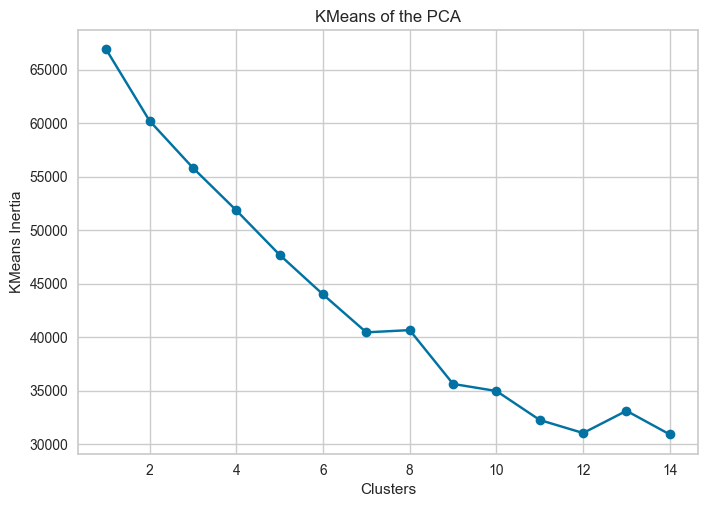

In [52]:
plt.title('KMeans of the PCA')
plt.plot(range(1,15), wcss, marker='o')
plt.xlabel('Clusters')
plt.ylabel('KMeans Inertia')
plt.show()

Using the [elbow method](https://www.analyticsvidhya.com/blog/2021/01/in-depth-intuition-of-k-means-clustering-algorithm-in-machine-learning/) we can see that the number of clusters ideally is 7 judging with the eyes but lets check.

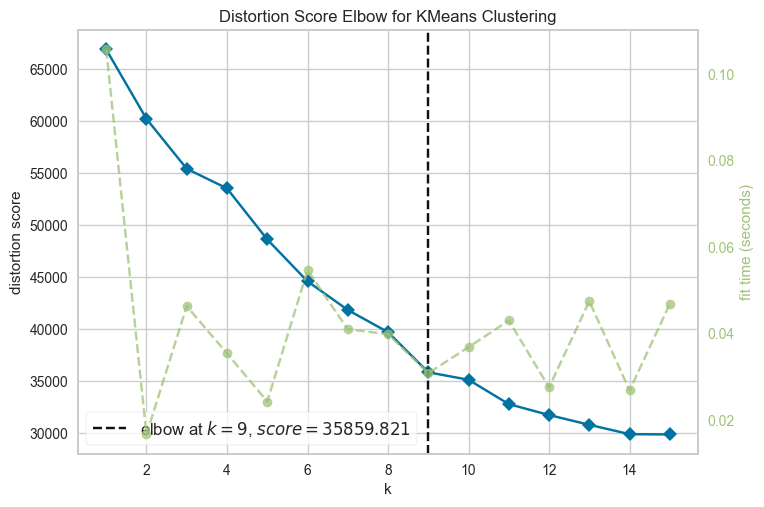

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [72]:

km = KMeans(n_init='auto',init='k-means++')
visualizer = KElbowVisualizer(km, k=(1,16))

visualizer.fit(pca_df)        # Fit the data to the visualizer
visualizer.show()

The KElbowVisualizer model is predicting 9, but is 9 the most optimal.
___

### Silhoutte Method

Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually.

Let us crosscheck with this to pick our _**k**_, it requires the following conditions:

>1. For a particular K, all the clusters should have a Silhouette score greater than the average score of the data set represented by the red-dotted line. The x-axis represents the Silhouette score.
>2. There shouldn’t be wide fluctuations in the size of the clusters. The width of the clusters represents the number of data points.

0.1279514780825369
0.12171027670842022
0.12915334668237222
0.1425019814827741
0.13552929603405675
0.1437093719849474
0.14300210616278042
0.13826922333370006
0.14578147254529122
0.16533094245122829
0.1598601681993413
0.1579696162417767
0.13783583638250313


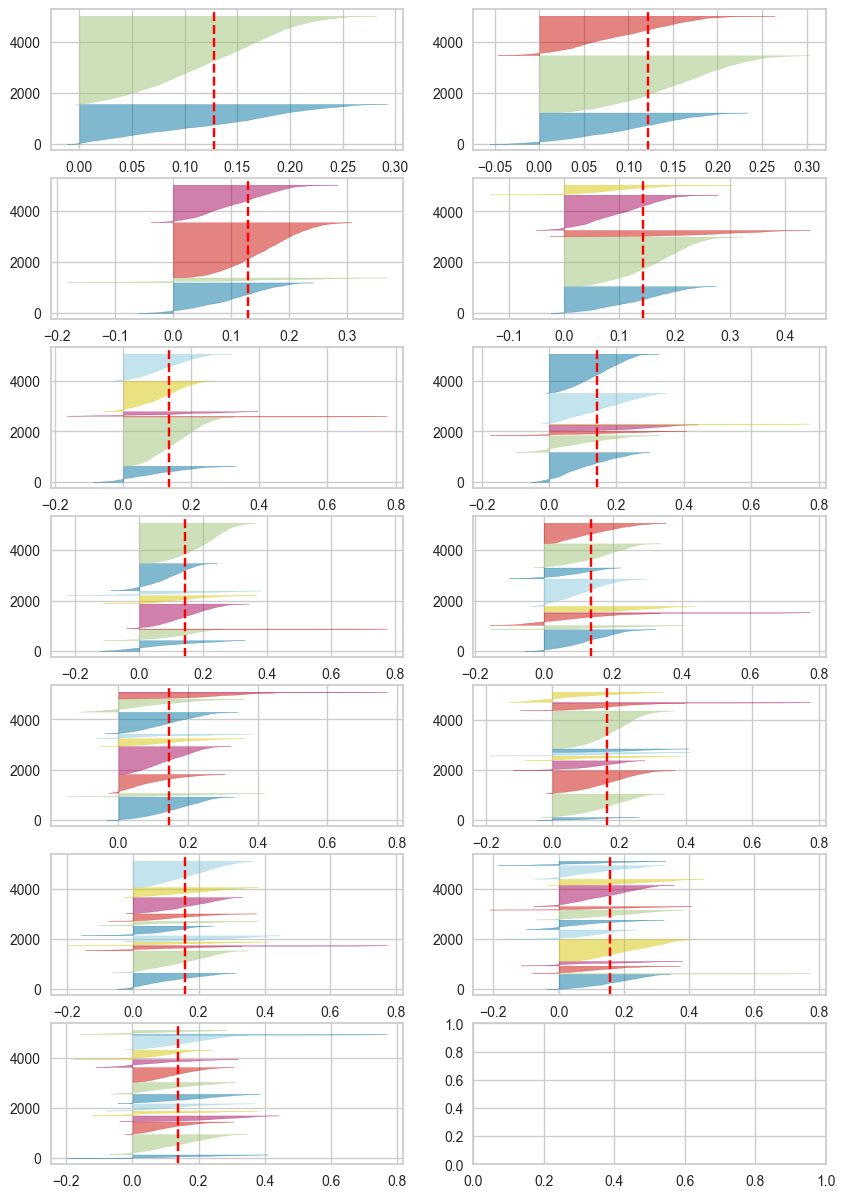

In [54]:

fig, ax = plt.subplots(7, 2, figsize=(10,15))
for i in [2, 3, 4, 5,6,7,8,9,10,11,12,13,14]:
    '''
    Create KMeans instances for different number of clusters
    '''

    km = KMeans(n_clusters=i, init='random', n_init='auto',)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer_sil = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer_sil.fit(pca_df)
    # plt.vlines(, ymin=0,ymax=2000 )
    print(visualizer_sil.silhouette_score_)



Using the above conditions for selecting our cluster,

1. They all pass the first check, they are above the mean, the red line is depicting the mean value.
2. Only <mark>k=3</mark> has close to equal sizes of the clusters.

We can deduce finally that we have 3 clusters.



Implementing this <mark>k=3</mark> in our KMeans algorithm now

### <a id="#Kmeans-id"> KMeans</a>

In [55]:
Kmeans_pca = KMeans(n_clusters=3, init='k-means++', n_init='auto')

Kmeans_pca.fit(pca_df)


KMeans(n_clusters=3, n_init='auto')

In [56]:
# these are the cluster labels 
Kmeans_pca.labels_

array([1, 2, 2, ..., 1, 2, 2], dtype=int32)

In [63]:
# creating a dataframe from the components used by the KMeans
df_pc = pd.DataFrame(pca_df,columns=[f'Component{i}'for i in range(1,13)])
df_pc.head()

,Component1,Component2,Component3,Component4,Component5,Component6,Component7,Component8,Component9,Component10,Component11,Component12
0,1.385096,-1.743607,0.757280,-0.884192,-1.154893,-0.381603,-1.499777,-0.322020,-0.950544,0.235116,0.078541,0.445735
1,0.377618,-0.438815,1.517646,-1.014554,-0.416200,-0.455524,-1.024343,-0.255394,-2.341608,0.458212,0.336097,-0.572849
2,0.371911,0.135254,0.196502,-0.734063,-0.941219,-0.144708,-0.367693,0.759681,-0.286324,-0.044357,-0.174632,0.600966
3,-0.237800,0.444952,-0.042851,0.414431,-1.028683,-0.393852,-0.496796,0.684878,-0.138222,1.081454,-0.716558,0.065552
4,-0.663421,-1.546723,1.359329,0.604464,0.441148,-0.127318,0.498663,1.386125,0.010999,0.200780,-1.176535,0.398386


In [64]:
df_pc['Label'] = Kmeans_pca.labels_


In [65]:
df_pc.Label.value_counts()

2    2690
1    1445
0     865
Name: Label, dtype: int64

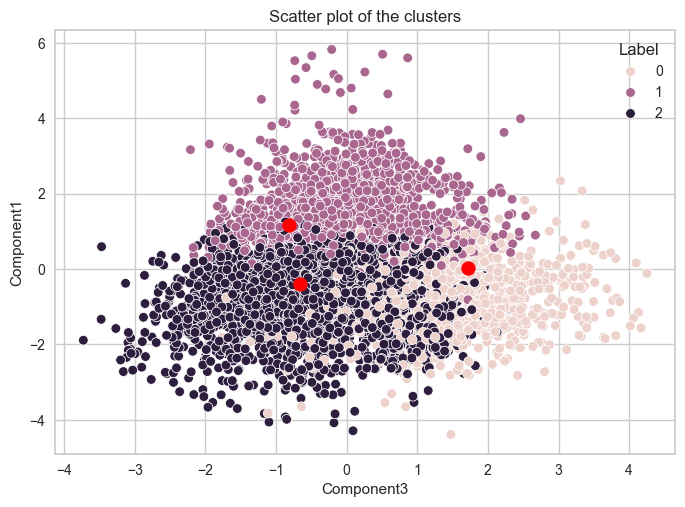

In [66]:
# to  create a plot of the data to see the clusters.
sns.scatterplot(data=df_pc, x='Component3', y='Component1', hue='Label', )
plt.title('Scatter plot of the clusters')
plt.scatter(Kmeans_pca.cluster_centers_[:, 0], Kmeans_pca.cluster_centers_[:, 1], s = 100, c = 'red', label = 'Centroids')
plt.show()

Clearly we can see the distinction in the 3 parts, and also we cna see the centroids in red.

In [67]:
combined_df = pd.concat([pd.DataFrame(scaled_df, columns=df.columns), df_pc], axis=1)

In [68]:
combined_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,...,Component4,Component5,Component6,Component7,Component8,Component9,Component10,Component11,Component12,Label
0,0.029411,-1.869799,-1.064913,-0.993444,1.152189,-0.857994,-1.386350,-1.069920,-0.361967,-0.695154,...,-0.884192,-1.154893,-0.381603,-1.499777,-0.322020,-0.950544,0.235116,0.078541,0.445735,1
1,0.838632,-1.074884,-1.010422,-0.993444,1.152189,-0.070699,-1.092619,-0.376697,-0.361967,-0.695154,...,-1.014554,-0.416200,-0.455524,-1.024343,-0.255394,-2.341608,0.458212,0.336097,-0.572849,2
2,-0.044154,-0.279969,0.233924,-0.698058,-0.425936,0.716596,-0.798888,-1.069920,-0.361967,-0.695154,...,-0.734063,-0.941219,-0.144708,-0.367693,0.759681,-0.286324,-0.044357,-0.174632,0.600966,2
3,1.059328,-0.279969,0.413286,-0.402671,-1.214999,-0.070699,-0.798888,-0.376697,1.296910,-0.695154,...,0.414431,-1.028683,-0.393852,-0.496796,0.684878,-0.138222,1.081454,-0.716558,0.065552,2
4,-0.779809,-0.279969,1.388265,-0.993444,1.152189,-0.070699,-0.505158,0.316525,1.296910,1.438530,...,0.604464,0.441148,-0.127318,0.498663,1.386125,0.010999,0.200780,-1.176535,0.398386,2


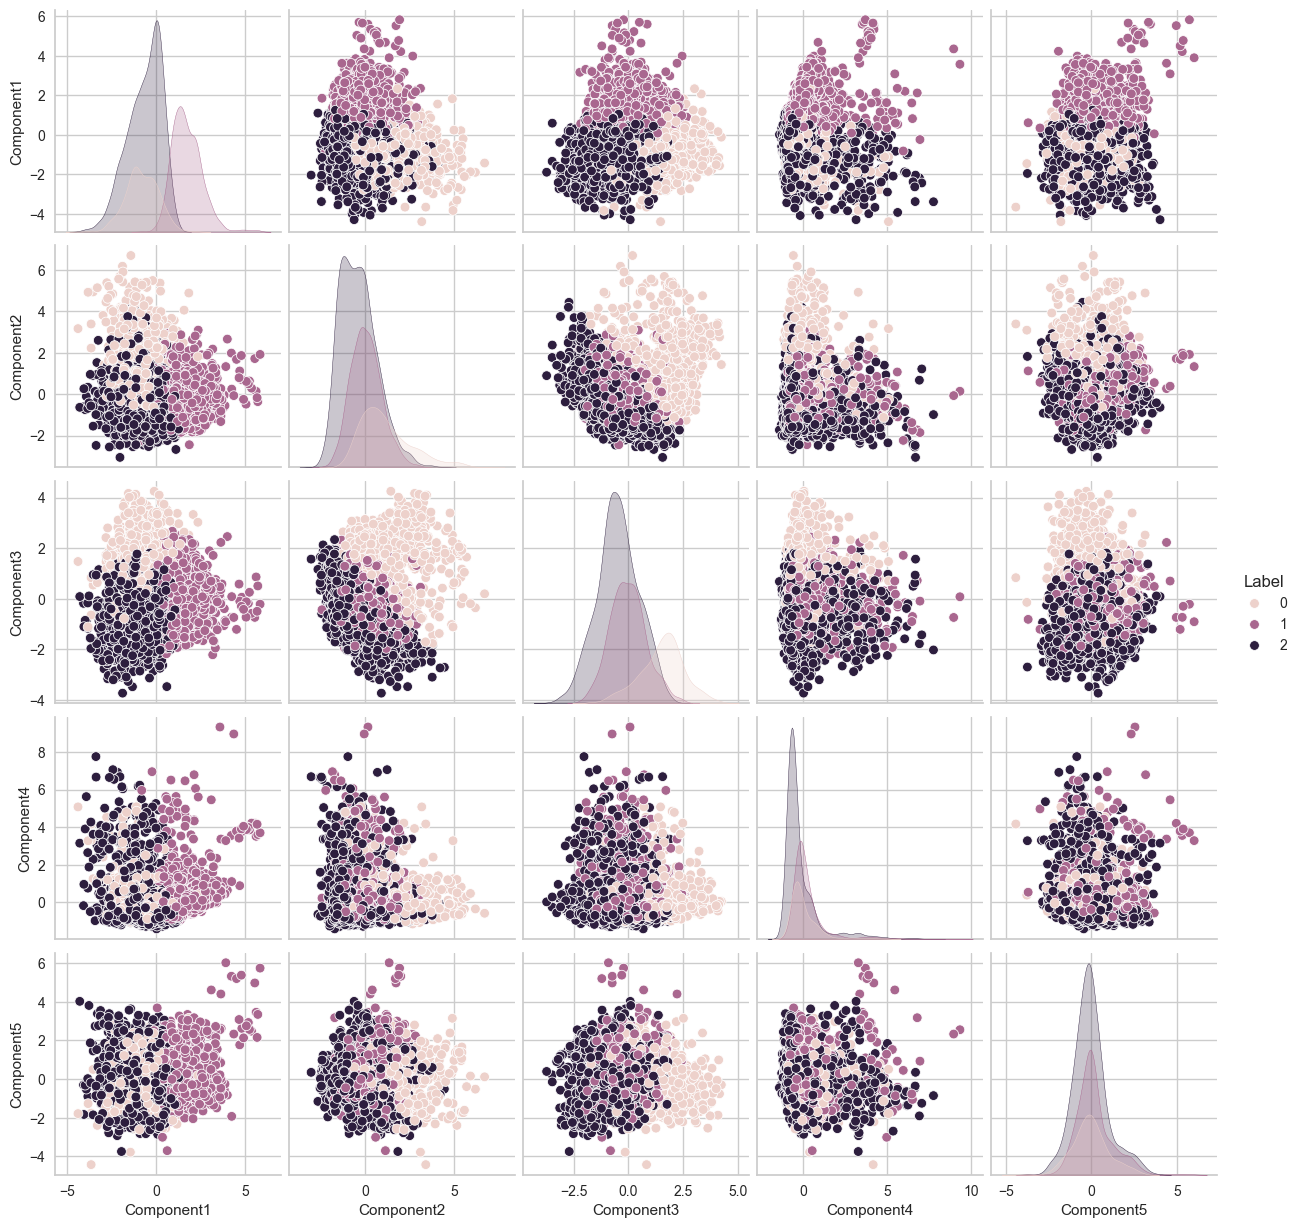

In [91]:
to_plot = ['Component1' ,'Component2', 'Component3', 'Component4', 'Component5','Label']
sns.pairplot(df_pc[to_plot], hue="Label" )
plt.show()

In [41]:
selected_variables =['Component1' ,'Component2', 'Component3']

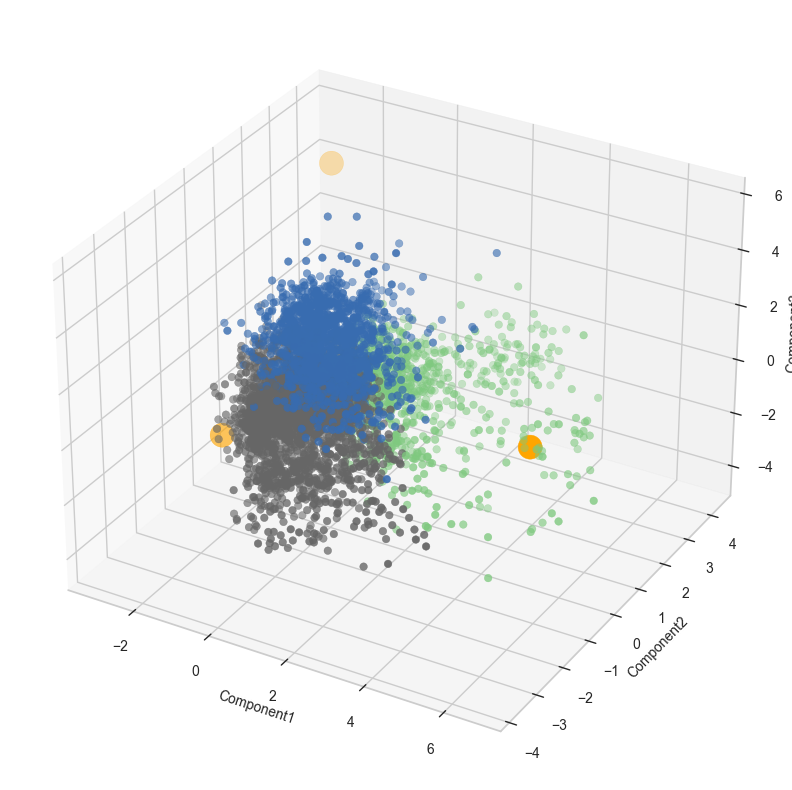

In [94]:
plt.figure(figsize=(10,10))

ax = plt.axes(projection="3d")
z_points = combined_df[selected_variables[0]]
x_points = combined_df[selected_variables[1]]
y_points = combined_df[selected_variables[2]]
f1=ax.scatter3D(x_points, y_points, z_points,
                c=combined_df.Label,
                cmap='Accent',
                s=30)
ax.set_xlabel(selected_variables[0],fontsize = 10)
ax.set_ylabel(selected_variables[1],fontsize = 10)
ax.set_zlabel(selected_variables[2],fontsize = 10)
# ax.legend(clusters)
f2 = ax.scatter3D(Kmeans_pca.cluster_centers_[:, 0]*3,
              Kmeans_pca.cluster_centers_[:, 1]*3,
              Kmeans_pca.cluster_centers_[:, 2]*3,
              s = 300, c = 'orange', label = 'Centroids')

plt.show()


The shape of the clusters make more sense in 3D, we can see that the overlap in the 2D isnt categorically an overlap.

## <a id='#conclusion'>Conclusion</a>
___

Interpreting the clusters using the top 3 components.
| component | interpretation |
| -- | -- |
|marital Status |   {' Never-married': -0.9, ' Married-civ-spouse': -0.1, ' Divorced': 0.7, ' Married-spouse-absent': 1.6, ' Separated': 2.4, ' Married-AF-spouse': 3.1, ' Widowed':3.9 }
 |
| sex  | {' Male': -0.75, ' Female': 1.45} |
| fnlwgt | -1.8, 8 |

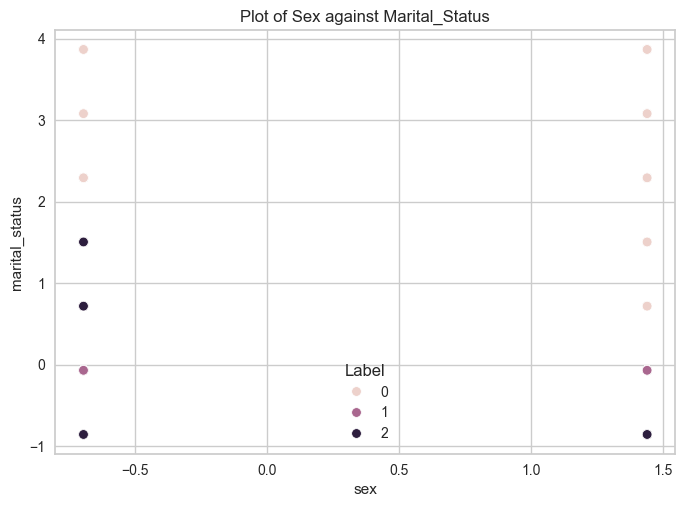

<Figure size 500x500 with 0 Axes>

In [77]:
sns.scatterplot(data=combined_df, x='sex', y='marital_status', hue='Label' )
plt.title('Plot of Sex against Marital_Status')
plt.figure(figsize=(5,5))
plt.show()

Checking the classes.

* Class 0: They are the females that are Widowed, Divorced, Separated, Married spouse absent, Married-AF-Spouse and males that are widowed, married-af-spouse, or separated,
* Class 1 : They are the married ones
* Class 2: They are the females and males that are never married and males that are divorced, or spouse absent


From these clusters we can have a theory that the clusters have to do with __*Finanacial power*__ of the participants in the dataset. 

Lets try another pair to confirm our assumption



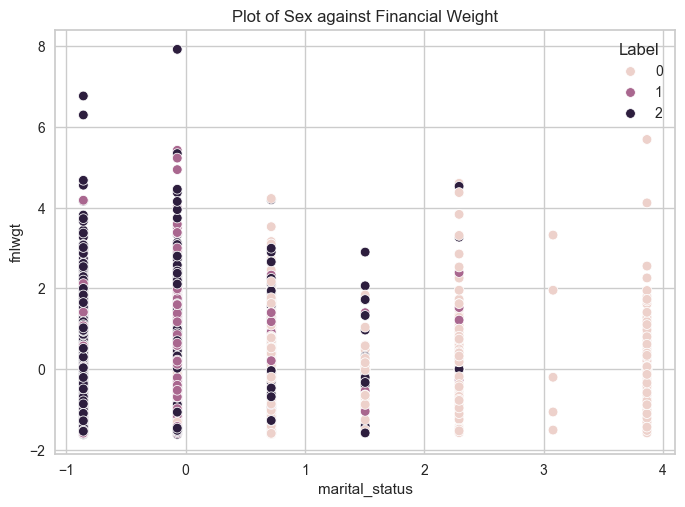

<Figure size 500x500 with 0 Axes>

In [79]:
sns.scatterplot(data=combined_df, x='marital_status', y='fnlwgt', hue='Label' )
plt.title('Plot of Sex against Financial Weight')
plt.figure(figsize=(5,5))
plt.show()

* Class 0: They are majorly the Widowed, Divorced, Separated, Married spouse absent, Married-AF-Spouse 
* Class 1 : They are majorly married
* Class 2: They are majorly people that are never married


This further confirms my theory that the 3 clusters can be defined by their financial capability. 

> 1. Class 2 is richer than class 1,
> 2. Class 1 is richer than Class 0

---
Logically we have these theories: 

1. Married people pull funds together and are able to have an average financial capability because of shared responsibilites and income.
2. People that are never married have more money as they are solely responsible for themselves 
3. Male divorcees (class 2) are usually richer than female divorcees (class 0)


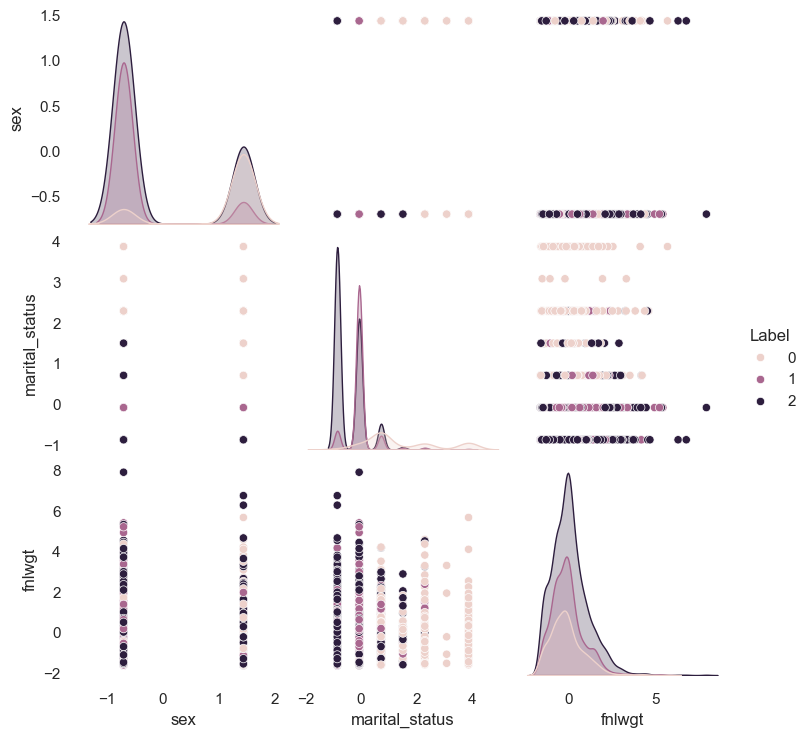

In [105]:
to_plot = ['sex','marital_status','fnlwgt','Label']
sns.pairplot(combined_df[to_plot], hue="Label", )
plt.show()